#K-Means Clustering
## Introduction
K-Means is an unsupervised clustering algorithm that partitions data into K clusters by minimizing within-cluster variance.  
This notebook shows a clean workflow:

data loading → EDA → preprocessing → choosing K → model training → evaluation & visualization → outputs and results.

##Importing Libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

###Uplaoding and loading dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 6.Mall_Customers.csv to 6.Mall_Customers.csv


In [3]:
df=pd.read_csv("6.Mall_Customers.csv")

###EDA

In [4]:
# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Nuber of rows and columns
df.shape

(200, 5)

In [6]:
#overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Check data types
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [9]:
#Check for missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


No missing values

In [10]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

No duplicates too

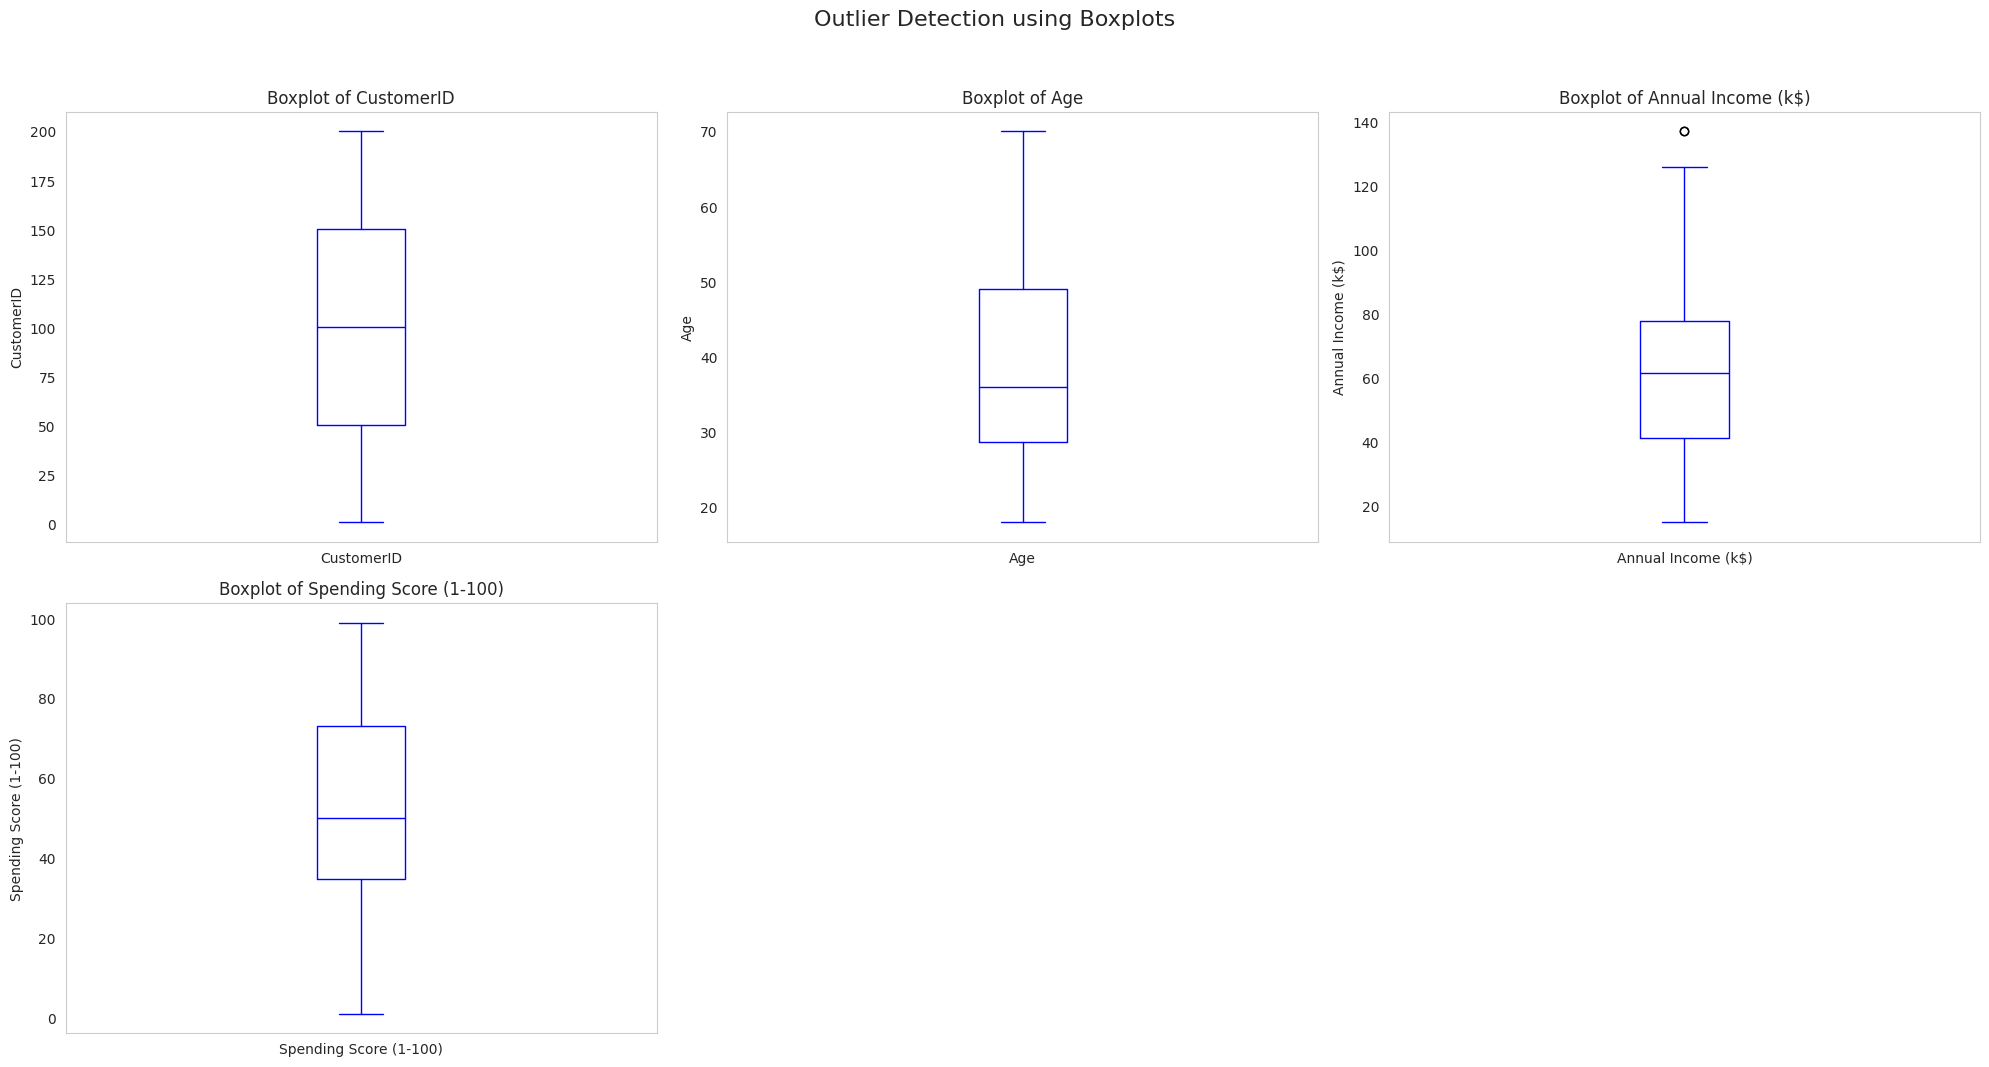

In [11]:
#Check for outliers
plt.figure(figsize = (20,15))
num_cols = df.select_dtypes(include=np.number).columns # Select only numeric columns for boxplots
# Generate boxplots for each numeric column
for i,col in enumerate(num_cols):
  plt.subplot(3,3,i+1)  # adjust grid based on number of numeric columns
  df.boxplot(column = col, grid = False, color = 'blue')
  plt.title(f"Boxplot of {col}", fontsize = 12)
  plt.ylabel(col)
plt.suptitle("Outlier Detection using Boxplots", fontsize = 16, y=1.02)
plt.tight_layout()
plt.show()

In [12]:
#Outlier treatment (Capping the values)
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range
for col in num_cols:
  lower,upper = remove_outlier(df[col])
  df[col]=np.where(df[col] > upper,upper, np.where(df[col] < lower, lower, df[col]))

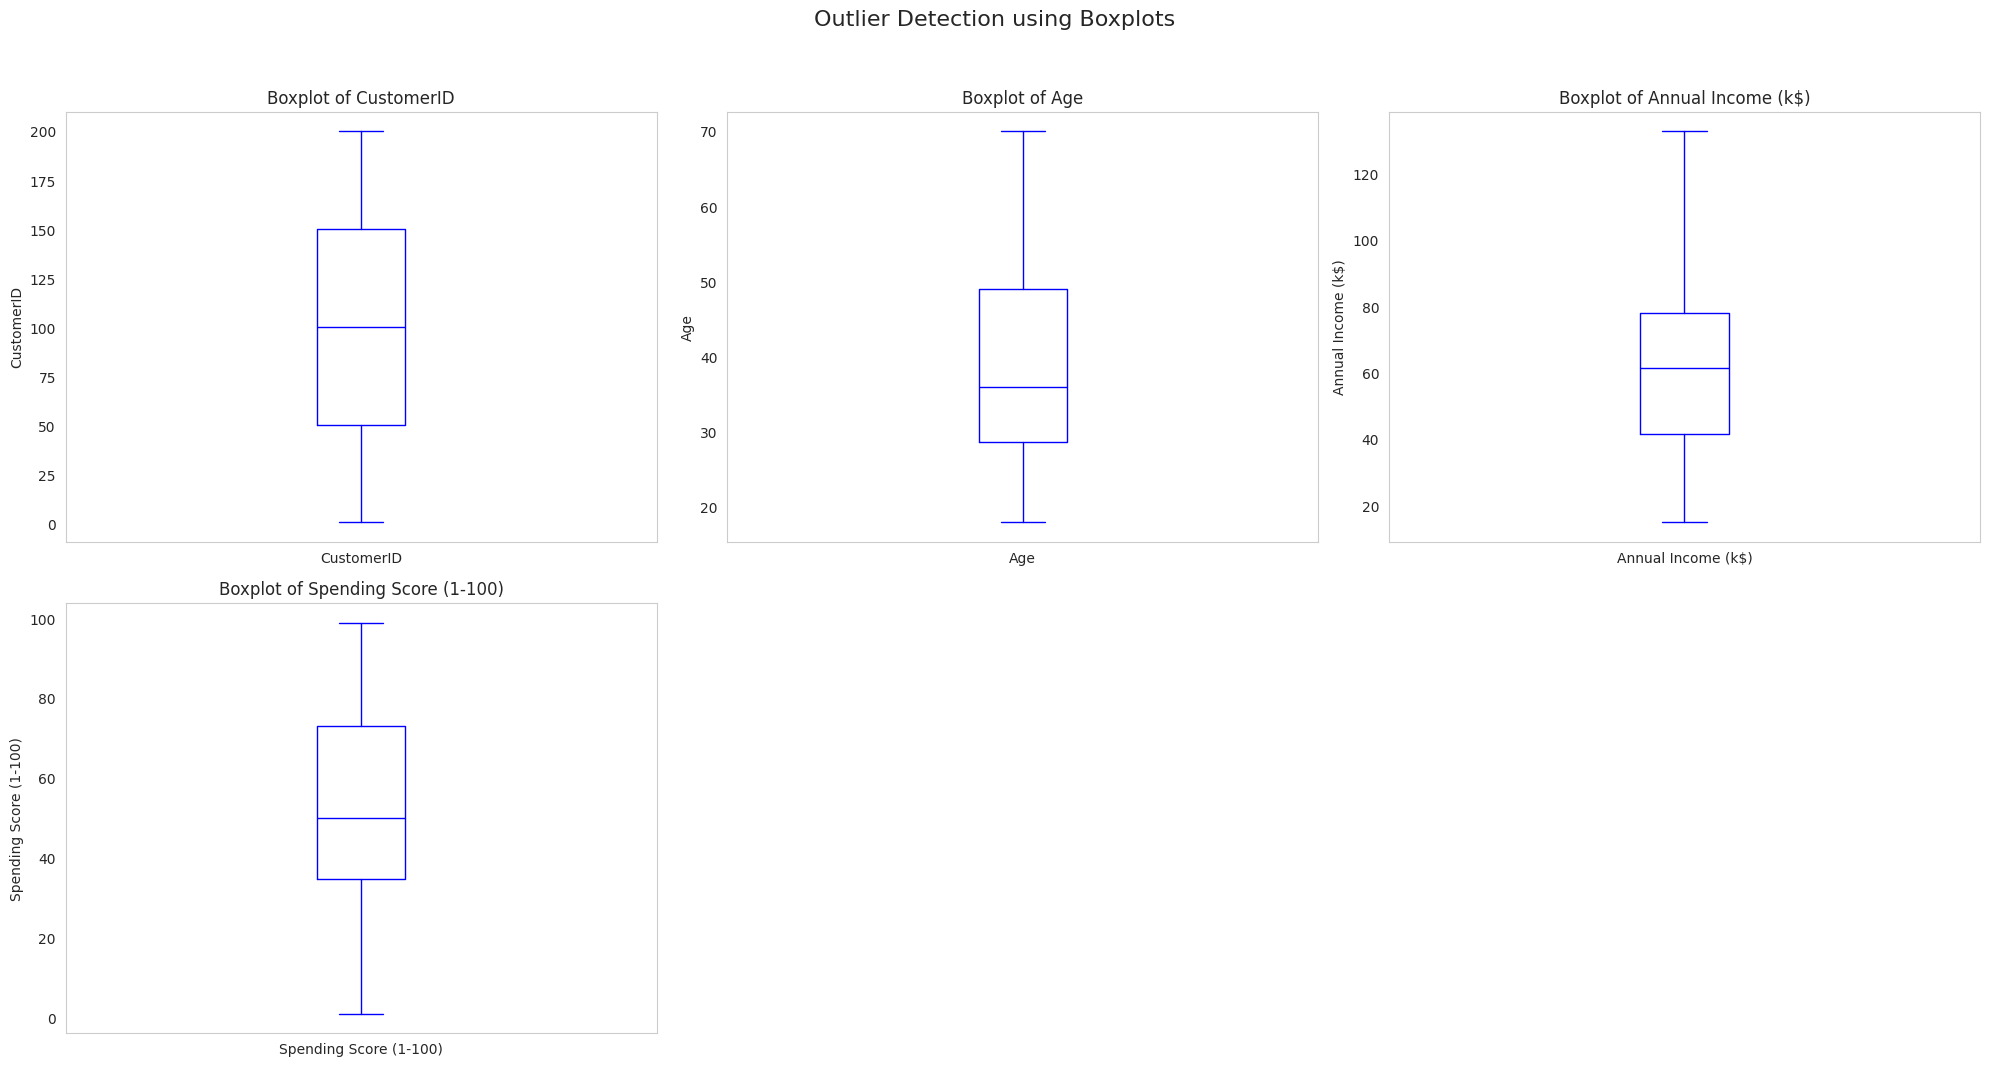

In [13]:
#Checking for outlier again after removal
plt.figure(figsize = (20,15))
num_cols = df.select_dtypes(include=np.number).columns # Select only numeric columns for boxplots
# Generate boxplots for each numeric column
for i,col in enumerate(num_cols):
  plt.subplot(3,3,i+1)  # adjust grid based on number of numeric columns
  df.boxplot(column = col, grid = False, color = 'blue')
  plt.title(f"Boxplot of {col}", fontsize = 12)
  plt.ylabel(col)
plt.suptitle("Outlier Detection using Boxplots", fontsize = 16, y=1.02)
plt.tight_layout()
plt.show()

Outliers capped

###Correlation Heatmap

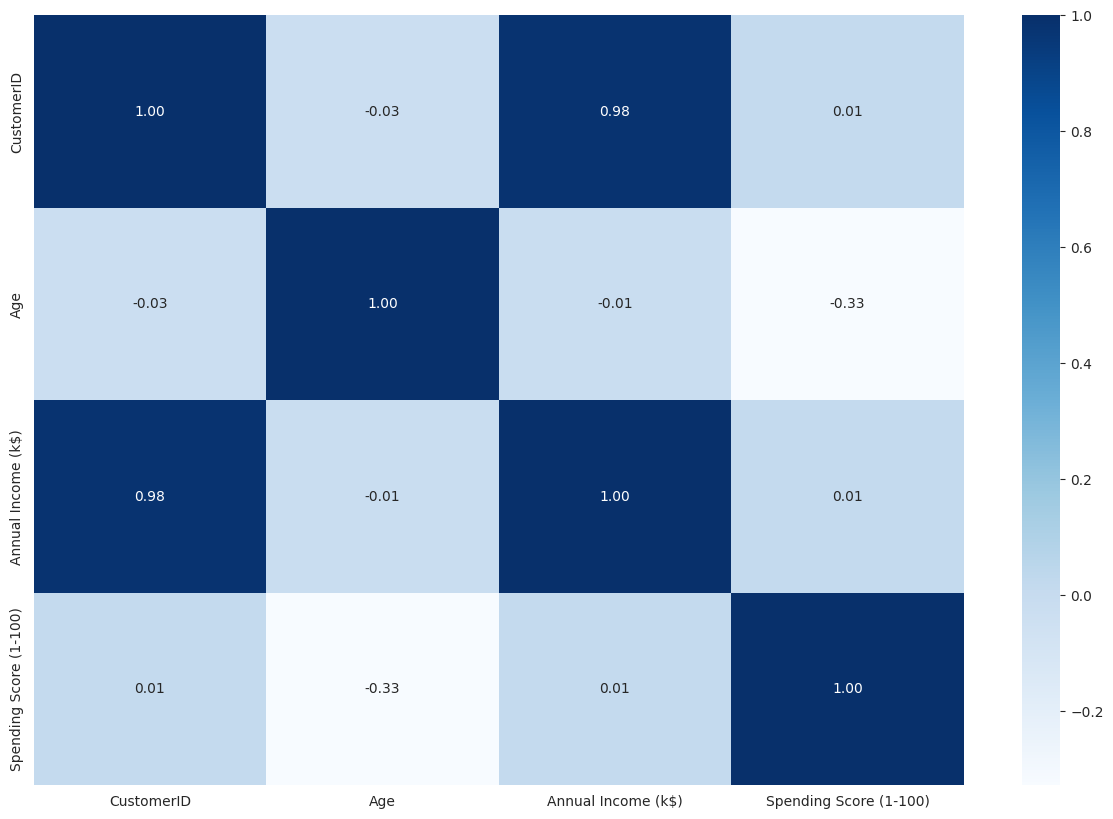

In [14]:
num_cols = df.select_dtypes(include=np.number)
plt.figure(figsize = (15,10))
sns.heatmap(num_cols.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()

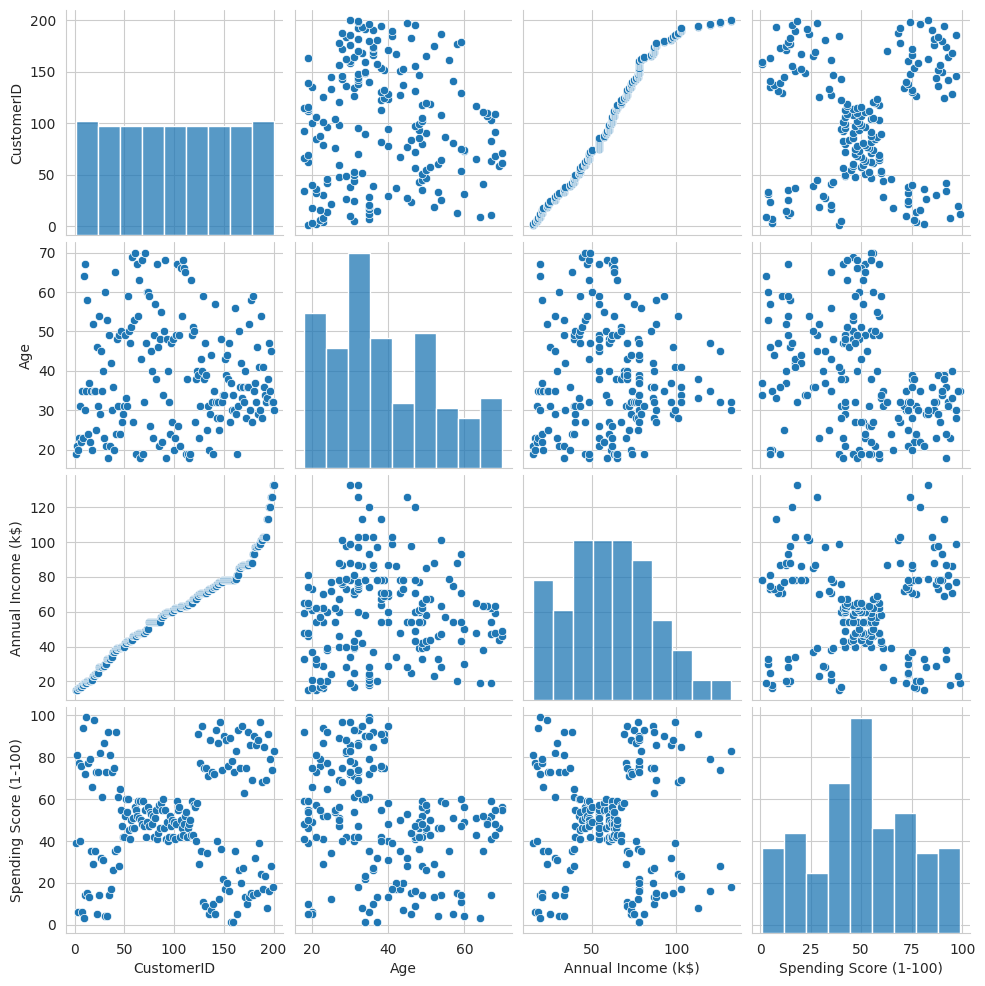

In [15]:
#Pairplot visualization
sns.pairplot(df)
plt.show()

###Data Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    float64
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [17]:
#Encoding categorical variables
df['Gender']= df['Gender'].replace({'Male': 1, 'Female': 0})

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,1,19.0,15.0,39.0
1,2.0,1,21.0,15.0,81.0
2,3.0,0,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,0,31.0,17.0,40.0


In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.745429,-0.434801
1,-1.706091,1.128152,-1.281035,-1.745429,1.195704
2,-1.688771,-0.886405,-1.352802,-1.707083,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.707083,1.040418
4,-1.654129,-0.886405,-0.563369,-1.668737,-0.395980


##Model Training

In [20]:
#Fitting K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 20, random_state = 42)
kmeans.fit(scaled_data)

KMeans(n_clusters=20, random_state=42)

In [21]:
#we use elbow method to find optimal number of clusters
inertia = []
k_range = range(1,21)
for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)


In [22]:
kmeans.labels_ #cluster labels (which cluster each data point belongs to)

array([13, 13,  2, 11,  2, 11,  2, 11, 15, 11, 15, 11, 12, 11, 15, 13,  2,
       13, 15, 11, 13, 13,  2, 13, 12, 13,  2, 13,  2, 11, 15, 11, 15,  4,
       12, 11,  2, 11,  2, 11, 12,  4,  0, 16, 12, 16,  5, 16, 16, 16,  5,
       13, 16,  0,  5,  0,  5,  0, 16,  0,  0, 10,  5,  5,  0, 10,  6,  5,
       10, 16,  0,  6,  5,  5,  0, 10,  6, 10, 16,  6,  0, 10,  0,  6, 16,
        0,  5, 16, 16,  6,  5, 10,  0,  6,  1, 10,  6,  1,  0, 10,  1,  6,
        0, 10,  0,  1,  5,  0,  0,  0,  0,  1,  6, 10,  1,  1,  5,  6,  6,
        6, 10,  6,  6, 18,  1, 19, 17, 18, 17, 18, 17, 18,  1, 19,  9, 19,
        8, 18,  9, 19,  8, 18,  1, 19,  9, 18, 17, 19,  8, 18, 17, 18,  8,
       19,  8, 19,  9, 19,  9, 19,  8, 19,  9, 19, 17, 19, 17,  7, 14,  3,
        9,  3,  9,  3,  8,  7, 17,  3, 17,  3, 14,  7, 17,  7, 14,  3, 14,
        3, 14,  7, 14,  7,  9,  7, 14,  7, 14,  3,  9,  3], dtype=int32)

In [23]:
kmeans.inertia_ #Within Cluster Sum of Squares

97.74528620287771

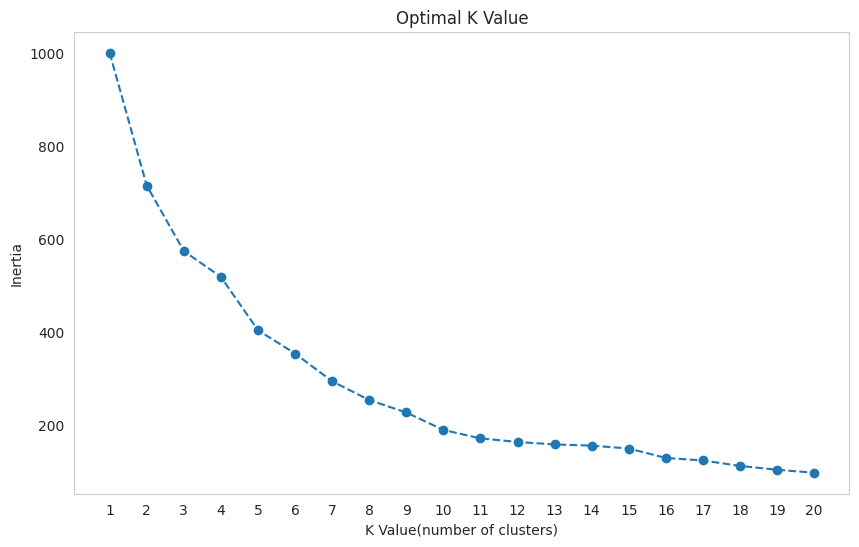

In [24]:
#Plot Elbow Graph
plt.figure(figsize = (10,6))
plt.plot(k_range, inertia, marker = 'o', linestyle = '--')
plt.title("Optimal K Value")
plt.xlabel("K Value(number of clusters)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid()
plt.show()

In [25]:
#Now we fit the model using optimal number of clusters
kmeans = KMeans(n_clusters = 6, init='k-means++', random_state = 42)
kmeans.fit(scaled_data)

KMeans(n_clusters=6, random_state=42)

In [26]:
df['Cluster'] = kmeans.labels_

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,1,19.0,15.0,39.0,5
1,2.0,1,21.0,15.0,81.0,5
2,3.0,0,20.0,16.0,6.0,2
3,4.0,0,23.0,16.0,77.0,2
4,5.0,0,31.0,17.0,40.0,2


In [30]:
#️Evaluating Clustering Performance

from sklearn.metrics import silhouette_score, silhouette_samples

# Predict cluster labels (already fitted)
labels = kmeans.labels_

# Compute metrics
silhouette = silhouette_score(scaled_data, labels)
print("✅ Clustering Performance Metrics")
print(f"Silhouette Score: {silhouette:.4f}")


✅ Clustering Performance Metrics
Silhouette Score: 0.3036
